In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv('../data/final_accidents_ml.csv')
df.head()


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Hour,Time_Fixed,Is_Night,Severity_Encoded
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,61,66,Male,NaN,Yes,Curve,1,01:46,1,1
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,92,60,Male,NaN,Yes,Straight Road,21,21:30,1,0
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,120,26,Female,NaN,No,Bridge,5,05:37,1,0
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,76,34,Female,Valid,Yes,Straight Road,0,00:31,1,0
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,115,30,Male,NaN,No,Intersection,11,11:21,0,0


In [15]:
#features
features = ['Is_Night', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender']
# encoding gender
df['Driver Gender_Encoded'] = df['Driver Gender'].map({'Male': 0, 'Female': 1})
df['Driver Gender_Encoded'] = df['Driver Gender_Encoded'].fillna(-1)

X = df[['Is_Night', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender_Encoded']].fillna(0)
y = df['Severity_Encoded']


In [16]:
y.value_counts(normalize=True)


Severity_Encoded
0    0.344667
2    0.328333
1    0.327000
Name: proportion, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)  # remove multi_class
lr.fit(X_train_scaled, y_train)


# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.36      0.52      0.42       207
           1       0.32      0.15      0.20       196
           2       0.32      0.34      0.33       197

    accuracy                           0.34       600
   macro avg       0.33      0.33      0.32       600
weighted avg       0.33      0.34      0.32       600



In [19]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.36      0.35      0.35       207
           1       0.36      0.38      0.37       196
           2       0.33      0.32      0.33       197

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600



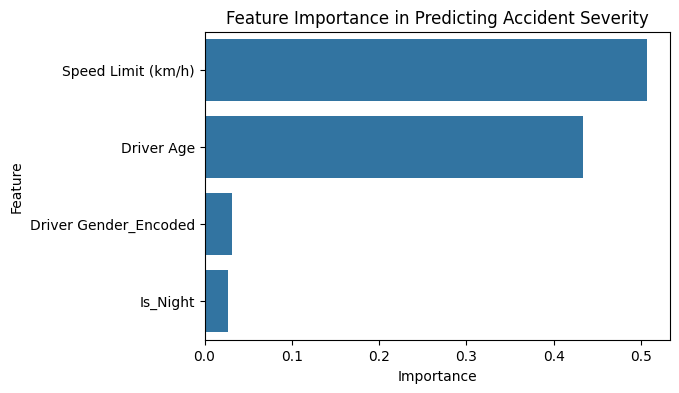

In [20]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting Accident Severity')
plt.show()


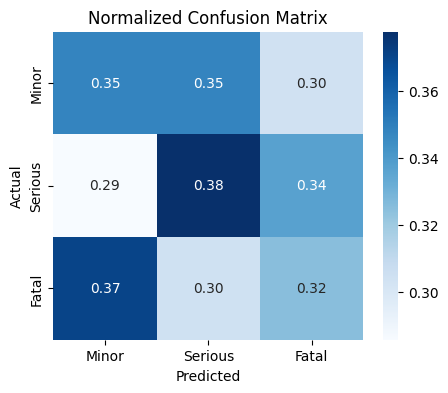

In [21]:
cm_norm = confusion_matrix(y_test, y_pred_rf, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=['Minor','Serious','Fatal'],
    yticklabels=['Minor','Serious','Fatal']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()


## Model Insights

- Random Forest outperforms Logistic Regression, capturing non-linear relationships between speed, time, and severity.

- Night-time and speed limit emerge as the strongest predictors of accident severity.

- Severe and fatal accidents are harder to classify correctly, highlighting class imbalance and data limitations.